## Μέρος 2. Εφαρμογή Beamforming για Speech Enhancement
### 2.1 Beamforming σε προσομοιωμένα σήματα


Α) Σε αυτή την άσκηση έχουμε μια γραμμική συστοιχία Ν=7 μικροφώνων σε απόσταση d=8cm, μία πηγή που παράγει ένα σήμα φωνής και βρίσκεται σε γωνία 45 μοιρών και μία πηγή που παράγει ένα σήμα θορύβου και βρίσκεται σε γωνία 135 μοιρών σε σχέση με τη συστοιχία. Τα σήματα πηγής και θορύβου είναι ασυσχέτιστα.<br>
Κάνουμε import τις απαραίτητες βιβλιοθήκες:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import scipy
import math
import cmath


Αρχικά φορτώνουμε το σήμα φωνής και τα σήματα φωνής με θόρυβο που καταγράφουν οι αισθητήρες με συχνότητα δειγματοληψίας 48kHz. Ενδεικτικά αναπαριστούμε το σήμα της πηγής και του πρώτου και κεντρικού αισθητήρα.

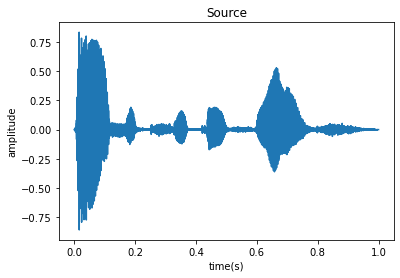

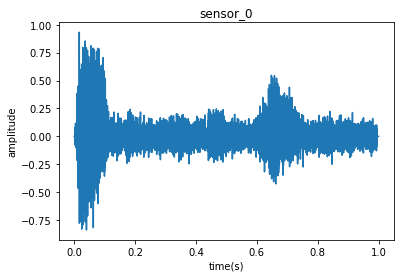

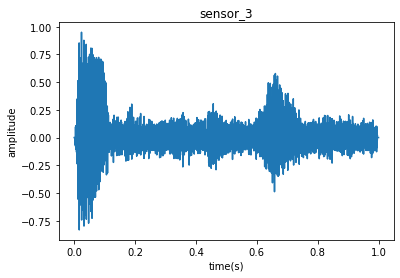

In [2]:
#A
#1
source, sr = librosa.load ("./Material/MicArraySimulatedSignals/source.wav",sr=48000)
sensor = []
for i in range(7):
    sensor.append([])
sensor[0], sr = librosa.load ("./Material/MicArraySimulatedSignals/sensor_0.wav",sr=48000)
sensor[1], sr = librosa.load ("./Material/MicArraySimulatedSignals/sensor_1.wav",sr=48000)
sensor[2], sr = librosa.load ("./Material/MicArraySimulatedSignals/sensor_2.wav",sr=48000)
sensor[3], sr = librosa.load ("./Material/MicArraySimulatedSignals/sensor_3.wav",sr=48000)
sensor[4], sr = librosa.load ("./Material/MicArraySimulatedSignals/sensor_4.wav",sr=48000)
sensor[5], sr = librosa.load ("./Material/MicArraySimulatedSignals/sensor_5.wav",sr=48000)
sensor[6], sr = librosa.load ("./Material/MicArraySimulatedSignals/sensor_6.wav",sr=48000)

plt.figure()
plt.title("Source")
t=np.linspace(0,len(source)//sr,len(source))
plt.plot(t,source)
plt.xlabel("time(s)")
plt.ylabel("amplitude")
plt.show()

plt.figure()
plt.title("sensor_0")
t=np.linspace(0,len(sensor[0])//sr,len(sensor[0]))
plt.plot(t,sensor[0])
plt.xlabel("time(s)")
plt.ylabel("amplitude")
plt.show()

plt.figure()
plt.title("sensor_3")
t=np.linspace(0,len(sensor[3])//sr,len(sensor[3]))
plt.plot(t,sensor[3])
plt.xlabel("time(s)")
plt.ylabel("amplitude")
plt.show()


1.Υπολογίζουμε τα βάρη για τον delay-and-sum beamformer με βάση την εξίσωση 10. Πιο συγκεκριμένα, υπολογίζουμε πρώτα τις καθυστερήσεις tn. Επειδή αυτές δεν είναι ακέραιες, εργαζόμαστε στο πεδίο της συχνότητας ώστε να είναι δυνατή μη ακέραια μετατόπιση του σήματος, πολλαπλασιάζοντάς το με ένα μιγαδικό εκθετικό. Έτσι, υπολογίζουμε το διάνυσμα καθυστέρησης d(ks), και διαιρούμε τα στοιχεία του με Ν και παίρνουμε τον ανάστροφο πίνακα για να καταλήξουμε στο διάνυσμα βαρών Ht.

In [3]:
d = 0.08
N = 7
theta_source = np.pi/4
theta_noise = np.pi - np.pi/4
c = 340
omega_s= 2*np.pi*sr
w = np.linspace(-np.pi,np.pi,len(sensor[0])) - 2*np.pi/len(sensor[0])

#calculating delays

tn_source = np.zeros(7)

for i in range(7):
    n = i
    tn_source[i] =  ((n-(N-1)/2)*d*np.cos(theta_source)) / c
   
    
#print(tn_source)


dn_ks = []  
H = []
for i in range(7):
    dn_ks.append([])
    H.append([])
    
for i in range(7):
    delay = tn_source[i]
    for j in range (len(w)):
        
        cmp = complex(0.0,-sr*w[j]*delay)
        dn_ks[i].append(cmath.exp(cmp))
        H[i].append(cmath.exp(cmp)/N)

#print(dn_ks)

#weights
dn=np.array(dn_ks)

H_arr=np.array(H)
Ht=np.transpose(H_arr)
print(Ht)



    

[[0.14169531+0.01818246j 0.14234038+0.01213995j 0.14272789+0.00607547j
  ... 0.14272789-0.00607547j 0.14234038-0.01213995j
  0.14169531-0.01818246j]
 [0.14164131+0.01859846j 0.14231635+0.01241858j 0.14272188+0.00621517j
  ... 0.14272188-0.00621517j 0.14231635-0.01241858j
  0.14164131-0.01859846j]
 [0.14158608+0.01901431j 0.14229176+0.01269716j 0.14271573+0.00635487j
  ... 0.14271573-0.00635487j 0.14229176-0.01269716j
  0.14158608-0.01901431j]
 ...
 [0.14147198-0.01984549j 0.14224096-0.01325416j 0.14270301-0.00663424j
  ... 0.14270301+0.00663424j 0.14224096+0.01325416j
  0.14147198+0.01984549j]
 [0.14152964-0.01942997j 0.14226663-0.01297568j 0.14270944-0.00649456j
  ... 0.14270944+0.00649456j 0.14226663+0.01297568j
  0.14152964+0.01942997j]
 [0.14158609-0.01901429j 0.14229176-0.01269715j 0.14271573-0.00635486j
  ... 0.14271573+0.00635486j 0.14229176+0.01269715j
  0.14158609+0.01901429j]]


Για να βρούμε την έξοδο του beamformer, υπολογίζουμε τους μετασχηματισμούς Fourier F[i] των σημάτων που καταγράφονται στους αισθητήρες, πολλαπλασιάζουμε τα βάρη H με τον πίνακα που προκύπτει και παίρνουμε τον αντίστροφο μετασχηματισμό Fourier του αποτελέσματος αυτού, δηλαδή τα διανύσματα y[i]. Έπειτα, η έξοδος προκύπτει από την πρόσθεση των 7 αυτών διανυσμάτων.

C:\Users\30694\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


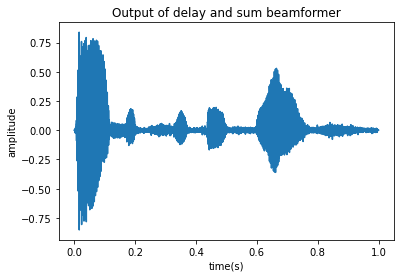

In [4]:
#fourier transforms
F = []
Y = []
y = []
for i in range(7):
    F.append([])
    Y.append([])
    y.append([])
for i in range(7):
    F[i]=scipy.fftpack.fft(sensor[i])

F_arr=np.array(F)


for i in range(7):
    Y[i]=(H_arr[i] * F[i])
    y[i]=scipy.fftpack.ifft(Y[i])



output= (y[0]+y[1]+y[2]+y[3]+y[4]+y[5]+y[6])
plt.figure()
plt.plot(t,output)
plt.title("Output of delay and sum beamformer")
plt.xlabel("time(s)")
plt.ylabel("amplitude")
plt.show()

Βλέπουμε ότι η έξοδος του delay-and-sum beamformer είναι αρκετά κοντά στο επιθυμητό σήμα, με αρκετά μεγάλο μέρος του θορύβου που καταγράφεται στους αισθητήρες να έχει αφαιρεθεί

Η έξοδος του beamformer βρίσκεται στο αρχείο sim_dis.wav

In [5]:
import soundfile as sf
sf.write('sim_ds.wav', output.real, 48000)

Μάλιστα, βλέπουμε ότι ο θόρυβος που παραμένει έχει πολύ μικρό πλάτος σε σχέση με το αρχικό σήμα.

C:\Users\30694\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


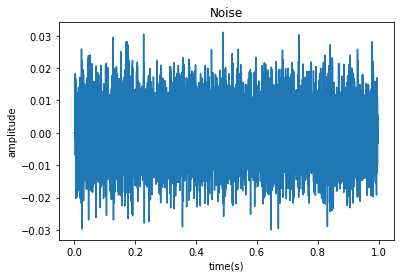

In [6]:
noise = source-output
plt.figure()
plt.plot(t,noise)
plt.title("Noise")
plt.xlabel("time(s)")
plt.ylabel("amplitude")
plt.show()

sf.write('noise.wav', noise.real, 48000)

2. Σχεδιάζουμε το σήμα της πηγής, το σήμα στην έξοδο του beamformer και το σήμα με θόρυβο στο κεντρικό μικρόφωνο:

C:\Users\30694\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


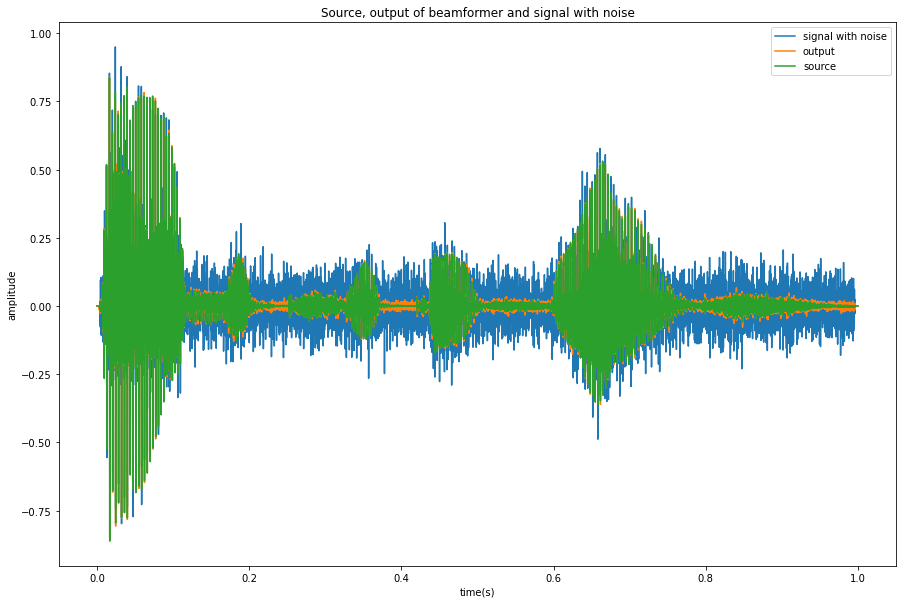

In [7]:
#2
plt.figure(figsize=(15,10))
plt.title("Source, output of beamformer and signal with noise")
plt.plot(t,sensor[3],label="signal with noise")
plt.plot(t,output,label="output")
plt.plot(t,source,label="source")

plt.legend()
plt.xlabel("time(s)")
plt.ylabel("amplitude")
plt.show()

Είναι εμφανές ότι η έξοδος του beamformer είναι αρκετά κοντά στο σήμα της πηγής, έχοντας αφαιρέσει το μεγαλύτερο μέρος του θορύβου που υπάρχει στο σήμα που καταγράφει ο αισθητήρας στο κεντρικό μικρόφωνο.

Σχεδιάζουμε τα σπεκτρογραφήματα των σημάτων της πηγής, της εξόδου του beamformer και του κεντρικού μικροφώνου:

<ipython-input-8-1524f2dbd748>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t1, f1, np.log10(Sxx1), shading='flat')


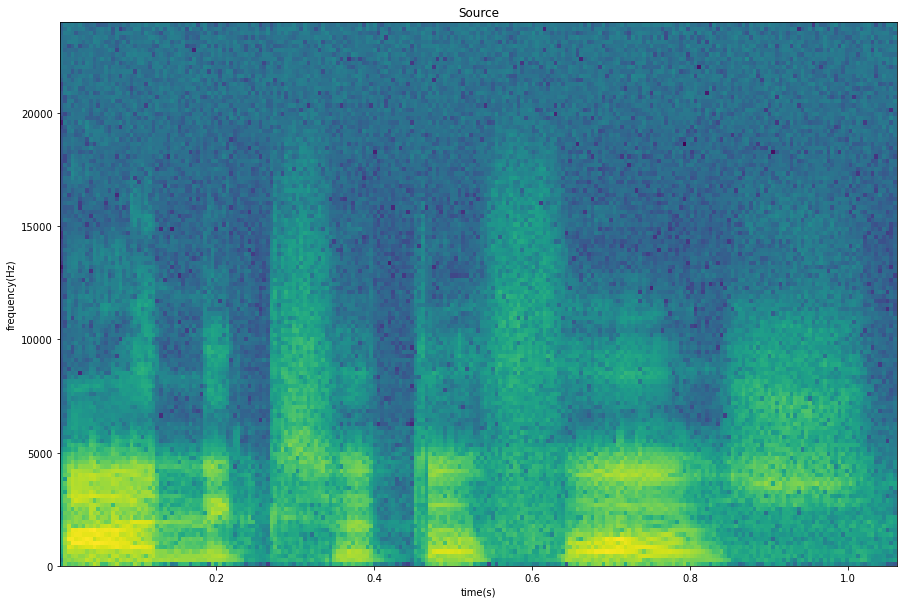

<ipython-input-8-1524f2dbd748>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t2, f2, np.log10(Sxx2), shading='flat')


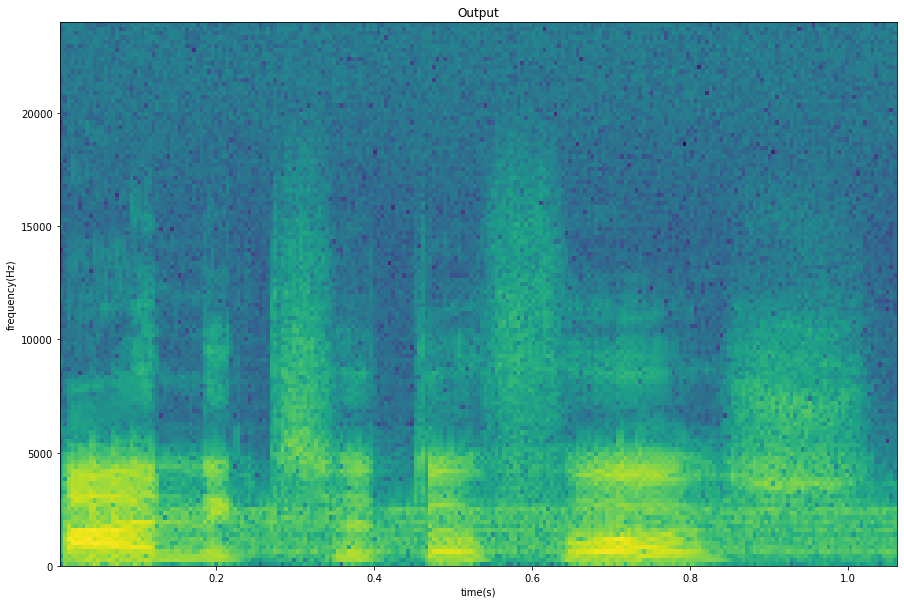

<ipython-input-8-1524f2dbd748>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t3, f3, np.log10(Sxx3), shading='flat')


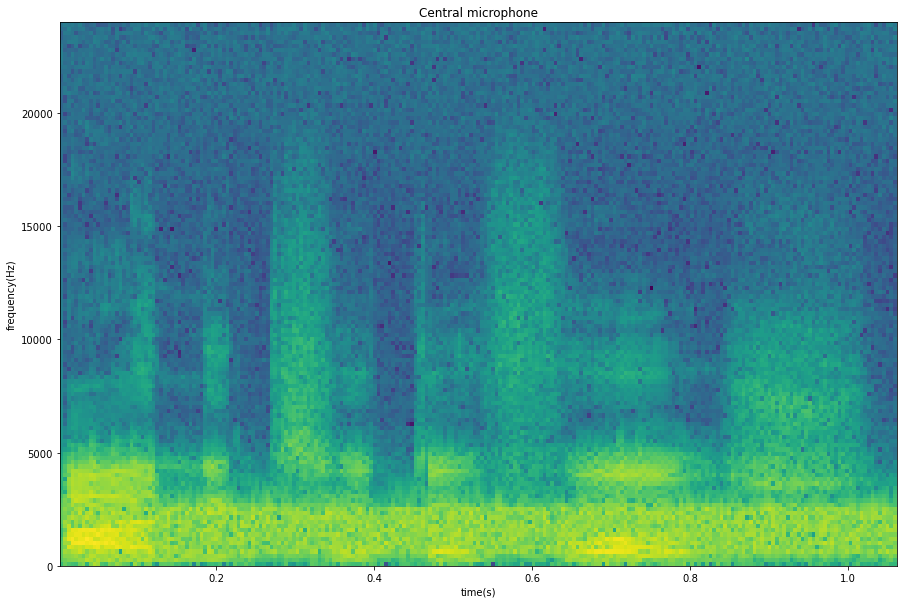

In [8]:
#spectrogramms

plt.figure(figsize=(15,10))
f1, t1, Sxx1 = scipy.signal.spectrogram(source, sr)
plt.pcolormesh(t1, f1, np.log10(Sxx1), shading='flat')
plt.title("Source")
plt.xlabel("time(s)")
plt.ylabel("frequency(Hz)")
plt.show()

plt.figure(figsize=(15,10))
f2, t2, Sxx2 = scipy.signal.spectrogram(output.real, sr)
plt.pcolormesh(t2, f2, np.log10(Sxx2), shading='flat')
plt.title("Οutput")
plt.xlabel("time(s)")
plt.ylabel("frequency(Hz)")
plt.show()

plt.figure(figsize=(15,10))
f3, t3, Sxx3 = scipy.signal.spectrogram(sensor[3], sr)
plt.pcolormesh(t3, f3, np.log10(Sxx3), shading='flat')
plt.title("Central microphone")
plt.xlabel("time(s)")
plt.ylabel("frequency(Hz)")
plt.show()


Και με τα σπεκτρογραφήματα βλέπουμε ότι η έξοδος είναι πιο κοντά στο αρχικό σήμα σε σχέση με το σήμα που περιέχει και θόρυβο. Πιο συγκεκριμένα, φαίνεται ότι έχει αφαιρεθεί ο θόρυβος που ανήκει στην περιοχή συχνοήτων περίπου ως τα 2.5kHz.

3. Υπολογίζουμε το SNR στο κεντρικό μικρόφωνο. Πρώτα βρίσκουμε τον θόρυβο, αφαιρώντας από το σήμα που καταγράφει ο αισθητήρας το αρχικό σήμα φωνής και έπειτα υπολογίζουμε τον λόγο SNR σε dB, με τη χρήση μιας βοηθητικής συνάρτησης για την εύρεση της ισχύος.

In [9]:
#3
#snr
def power(signal):
    res = 0
    for i in range(len(signal)):
        res+=np.abs(signal[i])**2
    return res/len(signal) 

center = sensor[3]
Pcenter = power(center)
center_noise = center - source
Pcenter_noise = power(center_noise)


center_snr = 10*np.log10((Pcenter - Pcenter_noise)/Pcenter_noise)
print("SNR of central microphone is: " + str(center_snr))



SNR of central microphone is: 3.0856145186210115


Με τον ίδιο τρόπο βρίσκουμε το SNR στην έξοδο του delay-and-sum beamformer:

In [10]:
output_noise = output - source
Poutput = power(output)
Poutput_noise = power(output_noise)
out_snr = (Poutput - Poutput_noise)/Poutput_noise
output_snr = 10*np.log10((Poutput - Poutput_noise)/Poutput_noise)
print("SNR of beamformer output is: " + str(output_snr))

SNR of beamformer output is: 20.261362462443856


Ο λόγος των δύο ποσοτήτων είναι:

In [11]:
ratio = output_snr/center_snr
print("SNR of output/SNR of central microphone = " +str(ratio))

SNR of output/SNR of central microphone = 6.566394583695062


Βλέπουμε ότι υπάρχει μια αρκετά μεγάλη βελτίωση στη σχέση σήματος-θορύβου στην έξοδο του beamformer.

Β) Θα εφαρμόσουμε μονοκαναλικό Wiener φιλτράρισμα στο σήμα στο κεντρικό μικρόφωνο και θα το συγκρίνουμε με την προηγούμενη μέθοδο. Αρχικά, επιλέγουμε το πλαίσιο του σήματος της πηγής και του κεντρικού μικροφώνου από 0.47s ως 0.50s, διάρκειας 30 ms.

In [12]:
center_mic = sensor[3]
frame = 0.03
samples = sr * frame
#print((((0.47/frame)*samples)))
#print(((0.5/frame)*samples))


In [13]:
frame_sig = center_mic[int((((0.47/frame)*samples)+1)):int(((0.5/frame)*samples))]
source_frame_sig = source[int((((0.47/frame)*samples)+1)):int(((0.5/frame)*samples))]
noise_frame_sig = noise[int((((0.47/frame)*samples)+1)):int(((0.5/frame)*samples))]


1. Bρίσκουμε τα φάσματα ισχύος τους και υπολογίζουμε την απόκριση συχνότητας του IIR Wiener φίλτρου, εφόσον τα σήματα είναι ασυσχέτιστα.

In [14]:
f1,P1 = scipy.signal.welch(frame_sig,fs=48000,nfft=1439,detrend=False, return_onesided=False)
f2,P2 = scipy.signal.welch(source_frame_sig,fs=48000,nfft=1439,detrend=False, return_onesided=False)
f3,P3 = scipy.signal.welch(noise_frame_sig, fs=48000,nfft=1439,detrend=False, return_onesided=False)


In [15]:
Hw = P2/P1
#print(len(Hw))

In [16]:
Hw_dB = 10*np.log10(Hw)

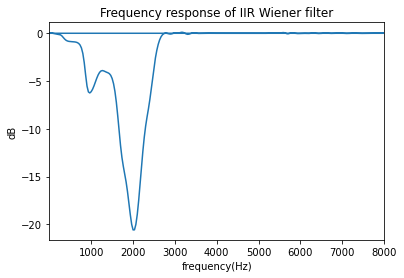

In [17]:
plt.figure()
f = np.linspace(0,8000,256)
plt.xlim(0.001,8000)
plt.title("Frequency response of IIR Wiener filter")
plt.xlabel("frequency(Hz)")
plt.ylabel("dB")
plt.plot(f2,Hw_dB)
plt.show()

2. Υπολογίζουμε το speech distortion index του φίλτρου

In [18]:
n = pow(np.abs(1-Hw),2)
n_dB = 10*np.log10(n)

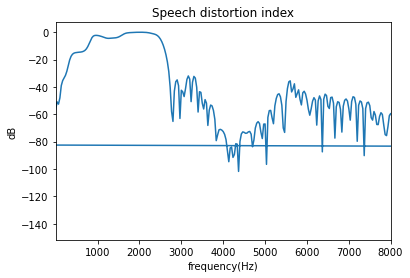

In [19]:
plt.figure()
plt.title("Speech distortion index")
plt.xlabel("frequency(Hz)")
plt.ylabel("dB")
plt.plot(f2,n_dB)
plt.xlim(0.01,8000)
plt.show()


Παρατηρούμε ότι στις συχνότητες ομιλίας του ανθρώπου (σχετικά χαμηλές), το φίλτρο έχει πιο καλή απόδοση, ενώ στις συχνόητητες του θορύβου έχουμε μεγαλύτερη παραμόρφωση.

3. Εφαρμόζουμε το Wiener φιλτράρισμα και σχεδιάζουμε τα φάσματα ισχύος  (α) του καθαρού σήματος φωνής στην είσοδο του Wiener φίλτρου s(t), (β) της θορυβώδους εισόδου του Wiener φίλτρου x(t), (γ) της εξόδου του Wiener φίλτρου και (δ) του σήματος θορύβου v(t) στην είσοδο του Wiener φιλτρου.

In [20]:
c_mic_fft = scipy.fftpack.fft(center_mic)
sig_wiener = c_mic_fft[int((((0.47/frame)*samples)+1)):int(((0.5/frame)*samples))] * Hw
sig_w_dB = 10*np.log10(sig_wiener)
c_mic_fft = scipy.fftpack.fft(center_mic)
sig_wiener = c_mic_fft[int((((0.47/frame)*samples)+1)):int(((0.5/frame)*samples))] * Hw
#print(len( c_mic_fft[int((((0.47/frame)*samples)+1)):int(((0.5/frame)*samples))]))
f4,P_s_w = scipy.signal.welch(source[int((((0.47/frame)*samples)+1)):int(((0.5/frame)*samples))],fs=48000,nfft=51265,detrend=False, return_onesided=False)
f5,P_c_w = scipy.signal.welch(center_mic[int((((0.47/frame)*samples)+1)):int(((0.5/frame)*samples))],fs=48000,nfft=51265,detrend=False, return_onesided=False)
f6,P_o_w = scipy.signal.welch(sig_wiener,fs=48000,nfft=51265,detrend=False, return_onesided=False)
f7,P_u_w = scipy.signal.welch(output_noise[int((((0.47/frame)*samples)+1)):int(((0.5/frame)*samples))],fs=48000,nfft=51625,detrend=False, return_onesided=False)
f8,P_ds_w = scipy.signal.welch(output[int((((0.47/frame)*samples)+1)):int(((0.5/frame)*samples))],fs=48000,nfft=51625,detrend=False, return_onesided=False)

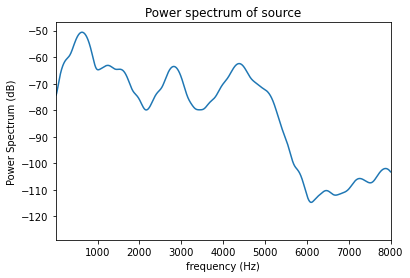

In [21]:

P_s_w_dB = 10*np.log10(P_s_w)
plt.figure()
plt.xlabel("frequency (Hz)")
plt.ylabel("Power Spectrum (dB)")
plt.title("Power spectrum of source")
plt.plot(P_s_w_dB)
plt.xlim(0.001,8000)
plt.show()



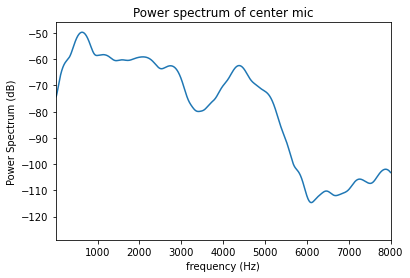

In [22]:
P_c_w_dB = 10*np.log10(P_c_w)
plt.figure()
plt.xlabel("frequency (Hz)")
plt.ylabel("Power Spectrum (dB)")
plt.title("Power spectrum of center mic")
plt.plot(P_c_w_dB)
plt.xlim(0.001,8000)
plt.show()

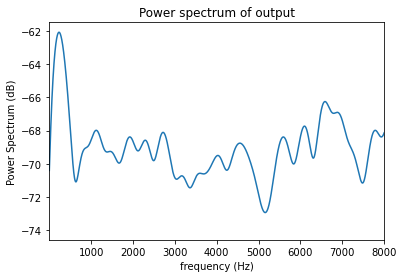

In [23]:
P_o_w_dB = 10*np.log10(P_o_w)
plt.figure()
plt.xlabel("frequency (Hz)")
plt.ylabel("Power Spectrum (dB)")
plt.title("Power spectrum of output")
plt.plot(P_o_w_dB)
plt.xlim(0.001,8000)
plt.show()

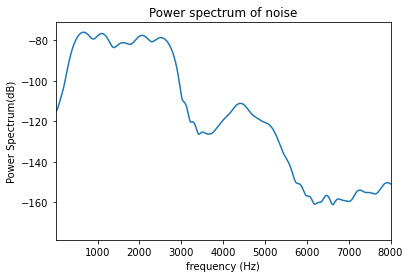

In [24]:
P_u_w_dB = 10*np.log10(P_u_w)
plt.figure()
plt.xlabel("frequency (Hz)")
plt.ylabel("Power Spectrum(dB)")
plt.title("Power spectrum of noise")
plt.plot(P_u_w_dB)
plt.xlim(0.001,8000)
plt.show()

4. Στη συνέχεια υπολογίζουμε το SNR της εξόδου και τo συγκρίνουμε με την έξοδο απο τον delay and sum beamformer

In [25]:
noise_of_filter = source[int((((0.47/frame)*samples)+1)):int(((0.5/frame)*samples))] - sig_wiener

In [26]:

def snr(signal,noise):
    sig_rms = np.sqrt(np.mean(signal**2))
    noise_rms = np.sqrt(np.mean(noise**2))
    snr = 10*np.log10((sig_rms/noise_rms)**2)
    return snr
snr_wiener = np.abs(snr(sig_wiener,noise_of_filter))
print("SNR of Wiener filter = ",snr_wiener)
print("improved by: ", snr_wiener/output_snr)


SNR of Wiener filter =  16.67113286762813
improved by:  0.8228041376057252


Συνεπώς το Wiener φίλτρο δίνει κάποια (σχετικά μικρή) βελτίωση στην ποιότητα του σήματος εξόδου.

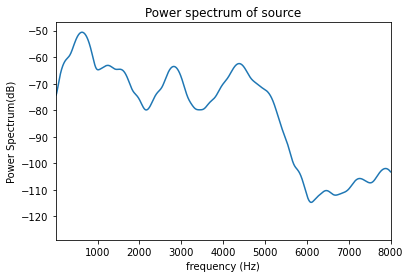

In [27]:
P_s_w_dB = 10*np.log10(P_s_w)
plt.figure()
plt.xlabel("frequency (Hz)")
plt.ylabel("Power Spectrum(dB)")
plt.title("Power spectrum of source")
plt.plot(P_s_w_dB)
plt.xlim(0.001,8000)
plt.show()



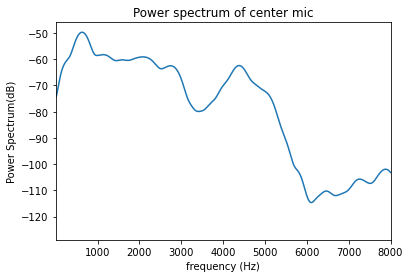

In [28]:
P_c_w_dB = 10*np.log10(P_c_w)
plt.figure()
plt.xlabel("frequency (Hz)")
plt.ylabel("Power Spectrum(dB)")
plt.title("Power spectrum of center mic")
plt.plot(P_c_w_dB)
plt.xlim(0.001,8000)
plt.show()

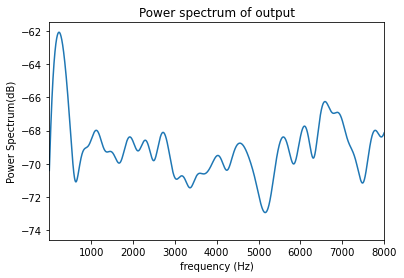

In [29]:
P_o_w_dB = 10*np.log10(P_o_w)
plt.figure()
plt.xlabel("frequency (Hz)")
plt.ylabel("Power Spectrum(dB)")
plt.title("Power spectrum of output")
plt.plot(P_o_w_dB)
plt.xlim(0.001,8000)
plt.show()

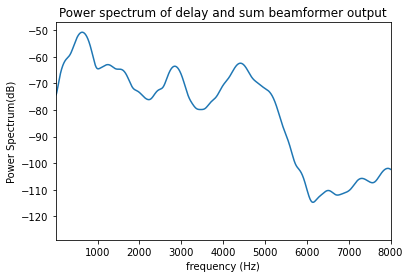

In [30]:
P_ds_w_dB = 10*np.log10(P_ds_w)
plt.figure()
plt.xlabel("frequency (Hz)")
plt.ylabel("Power Spectrum(dB)")
plt.title("Power spectrum of delay and sum beamformer output")
plt.plot(P_ds_w_dB)
plt.xlim(0.001,8000)
plt.show()

Η πολυκαναλική μέθοδος μας δίνει καλύτερα αποτελέσματα απο ένα single channel Wiener φίλτρο, αφού ο θόρυβος φιλτράρεται σε πολλά στάδια και λαμβάνεται υπόψιν ο χώρος, δηλαδή οι συντεταγμένες προέλευσης του θορύβου. Συνεπώς έχουμε καλύτερο φιλτράρισμα του θορύβου με την πολυκαναλική μέθοδο.